In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# 1. Data Understanding & Data Loading
# Load the dataset
df = pd.read_csv('day.csv')

# Display basic information about the dataset
print("Data Information:")
print(df.info())
print("\nFirst Five Rows of the Data:")
print(df.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

First Five Rows of the Data:
   instant      dteday  season  yr  mnth

In [35]:
# 2. Preprocessing Steps
# Drop 'casual' and 'registered' columns
df.drop(['casual', 'registered'], axis=1, inplace=True)

# Map categorical variables
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Light Rain', 4: 'Heavy Rain/Snow'})
df['yr'] = df['yr'].map({0: '2018', 1: '2019'})

# Create dummy variables for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Display the transformed dataset
print("\nData Information After Preprocessing:")
print(df.info())
print("\nFirst Five Rows of the Data After Preprocessing:")
print(df.head())


Data Information After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Columns: 745 entries, instant to weathersit_Mist
dtypes: bool(735), float64(4), int64(6)
memory usage: 581.1 KB
None

First Five Rows of the Data After Preprocessing:
   instant  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0        1     1        0        6           0  14.110847  18.18125  80.5833   
1        2     1        0        0           0  14.902598  17.68695  69.6087   
2        3     1        0        1           1   8.050924   9.47025  43.7273   
3        4     1        0        2           1   8.200000  10.60610  59.0435   
4        5     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  dteday_31-10-2018  dteday_31-10-2019  \
0  10.749882   985  ...              False              False   
1  16.652113   801  ...              False              False   
2  16.636703  1349  ...              False    


Univariate Analysis:


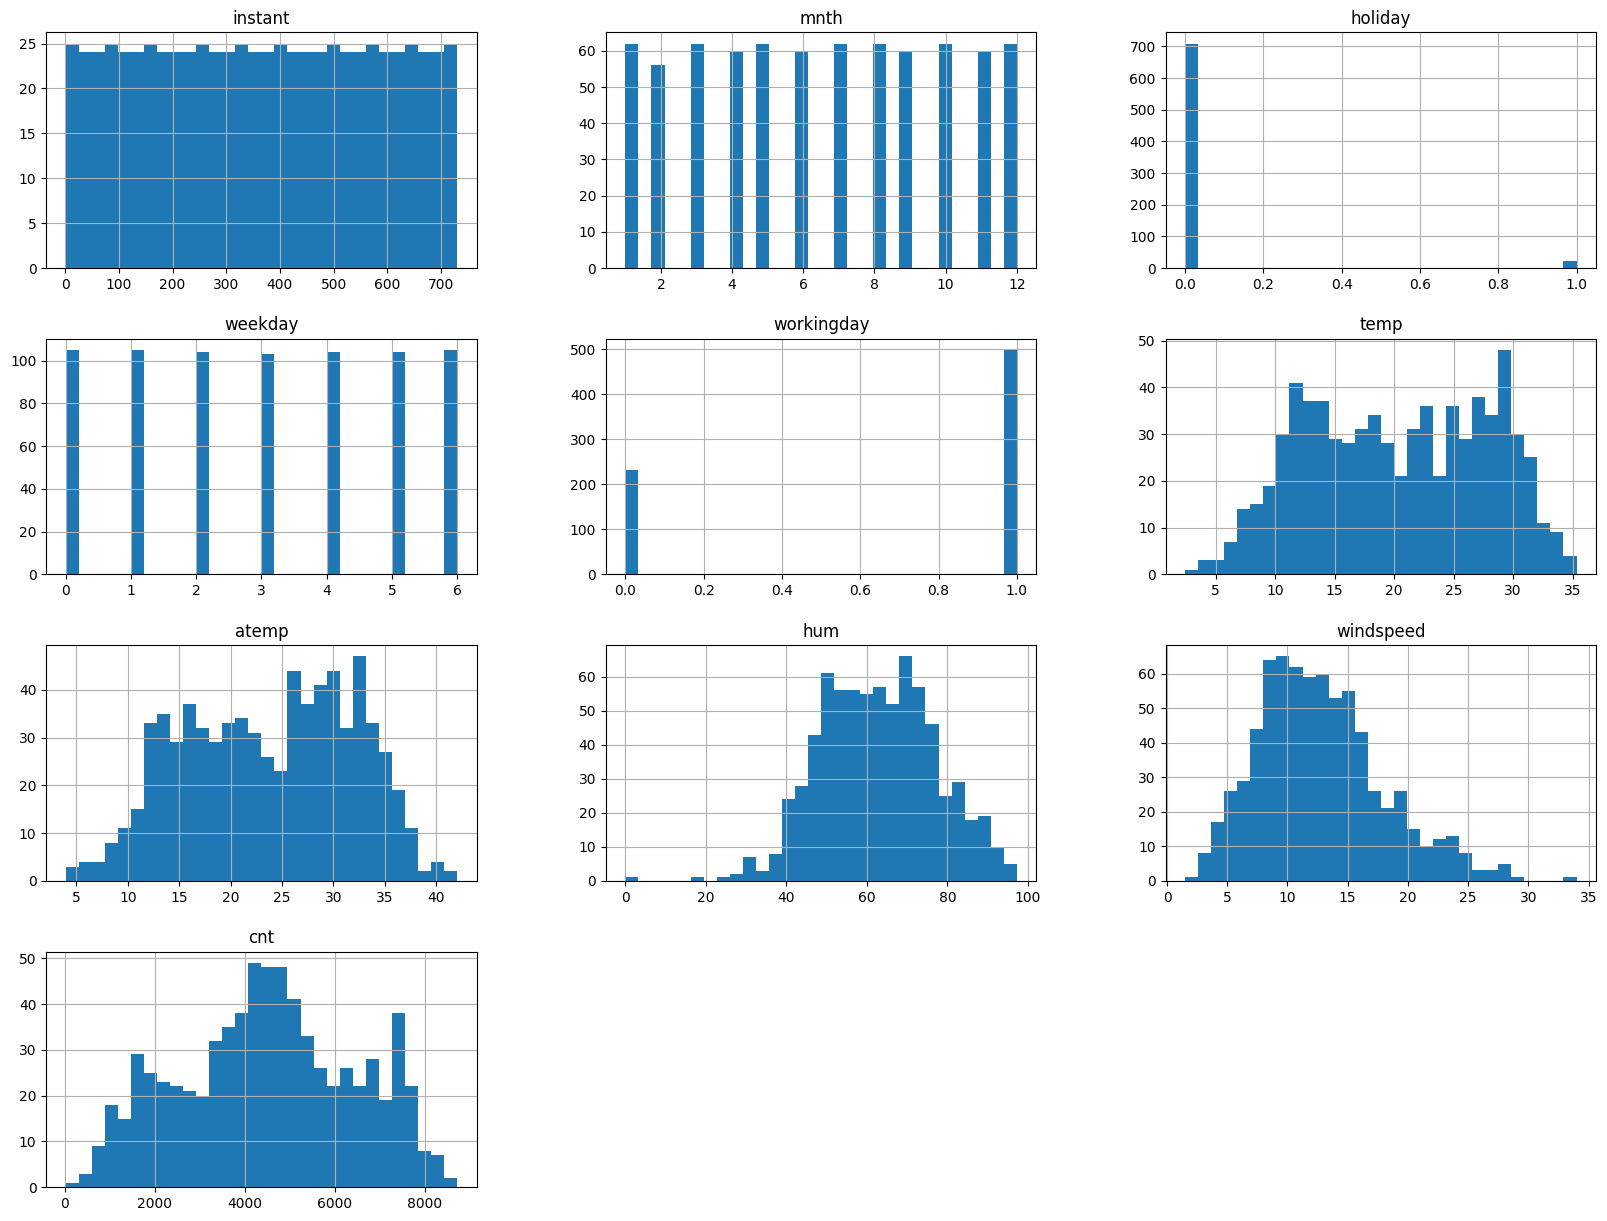


Data Columns:
Index(['instant', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt',
       ...
       'dteday_31-10-2018', 'dteday_31-10-2019', 'dteday_31-12-2018',
       'dteday_31-12-2019', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weathersit_Light Snow/Light Rain', 'weathersit_Mist'],
      dtype='object', length=745)

Bivariate Analysis:


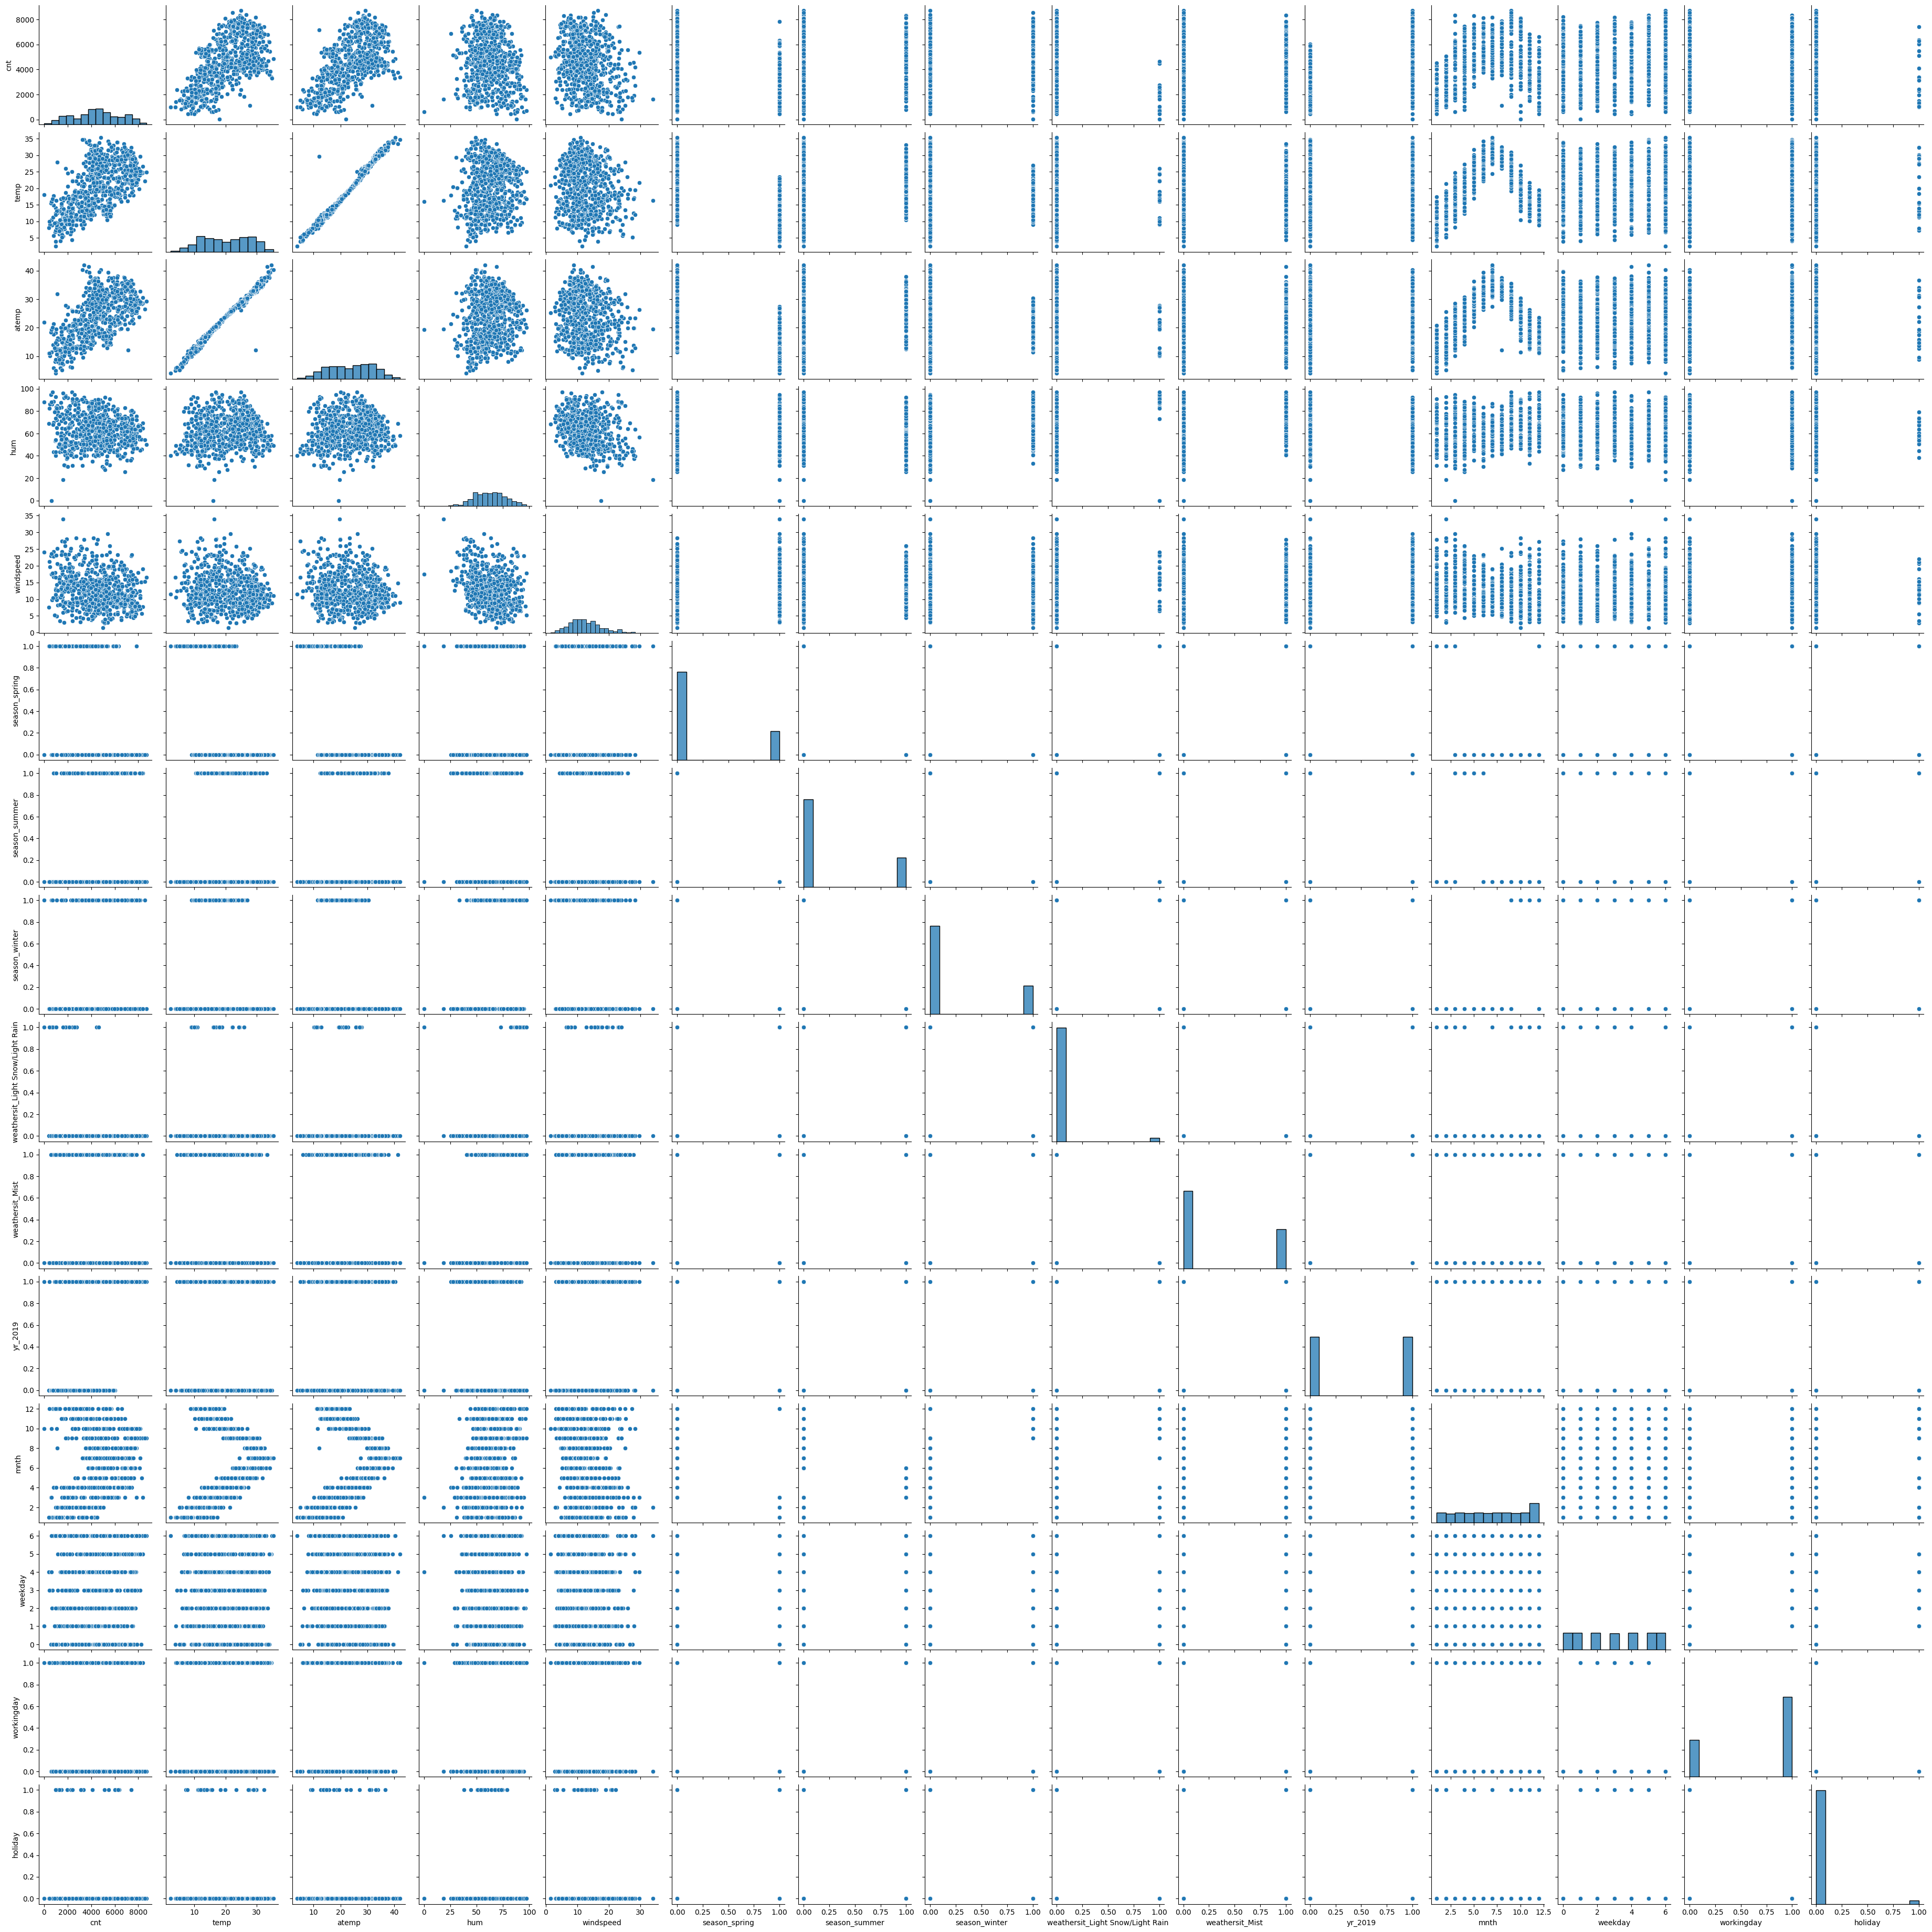

In [36]:
# 3. EDA (Exploratory Data Analysis)
# Univariate Analysis
print("\nUnivariate Analysis:")
df.hist(bins=30, figsize=(20, 15))
plt.show()

print("\nData Columns:")
print(df.columns)

# List of selected features for pairplot
selected_features = [
    'cnt', 'temp', 'atemp', 'hum', 'windspeed', 
    'season_spring', 'season_summer', 'season_winter',
    'weathersit_Light Snow/Light Rain', 'weathersit_Mist',
    'yr_2019', 'mnth', 'weekday', 'workingday', 'holiday'
]

# Ensure all selected features are in the DataFrame
selected_features = [feature for feature in selected_features if feature in df.columns]

# Bivariate Analysis
print("\nBivariate Analysis:")
sns.pairplot(df[selected_features])
plt.show()


In [37]:
# 4. Train-test Split
# Define the target variable and features
X = df.drop(columns=['cnt']) 
y = df['cnt']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("\nData Shapes After Train-Test Split:")
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')


Data Shapes After Train-Test Split:
Training data shape: (584, 744)
Test data shape: (146, 744)
Training labels shape: (584,)
Test labels shape: (146,)


In [38]:
# 5. Scaling
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [39]:
# 6. Feature Selection
# Initialize the model
lm = LinearRegression()

# Perform RFE (Recursive Feature Elimination)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print selected features
print("\nSelected Features:")
print(selected_features)

# Build model with selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

# Fit the regression model
model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Print the model summary
print("\nModel Summary:")
print(model.summary())

# Calculate VIF for each feature
# Create a DataFrame with the selected features
X_vif = pd.DataFrame(X_train_selected, columns=selected_features)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVIF Data:")
print(vif_data)


Selected Features:
Index(['temp', 'hum', 'windspeed', 'dteday_22-11-2019', 'dteday_30-10-2019',
       'season_spring', 'season_winter', 'yr_2019',
       'weathersit_Light Snow/Light Rain', 'weathersit_Mist'],
      dtype='object')

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     261.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.52e-206
Time:                        14:40:55   Log-Likelihood:                -4752.9
No. Observations:                 584   AIC:                             9528.
Df Residuals:                     573   BIC:                             9576.
Df Model:                          10                                         
Covariance Type:            nonrobust  

In [40]:
# 7. Model Building
# Final model
final_model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
print("\nFinal Model Summary:")
print(final_model.summary())


Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     261.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.52e-206
Time:                        14:40:55   Log-Likelihood:                -4752.9
No. Observations:                 584   AIC:                             9528.
Df Residuals:                     573   BIC:                             9576.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4546.3613     34.6

In [41]:
# 8. Evaluation (Test Data)
# Add constant for the intercept in the test set
X_test_selected = sm.add_constant(X_test_selected, has_constant='add')

# Ensure the number of columns in X_test_selected matches the number of parameters in final_model
if X_test_selected.shape[1] != final_model.params.shape[0]:
    raise ValueError(f'Number of columns in X_test_selected ({X_test_selected.shape[1]}) '
                     f'does not match number of parameters in final_model ({final_model.params.shape[0]})')

# Predict on the test set
y_pred = final_model.predict(X_test_selected)

# Calculate R-squared and Adjusted R-squared
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_selected.shape[1] - 1)

print(f'\nR-squared score on test set: {r2}')
print(f'Adjusted R-squared score on test set: {adjusted_r2}')


R-squared score on test set: 0.8473110362908225
Adjusted R-squared score on test set: 0.8347768676281289
